# Homework 4: Data Visualization
- **Name**:Muhammad Asadullah
- **UB Username**:masadull
- **UB Person Number**: 50366080

--- 
## Part 1 - Generate Plots According to Specifications

### Problem 1 - Scatter Plot with a Line

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


#reads from csv file and ignores rows starting with % 
data =pd.read_csv('scatter_data.csv', comment ='%', names=['x','y'])


x= data['x']
y =data['y']



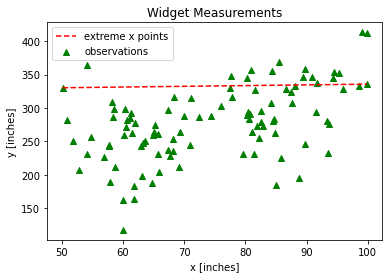

In [2]:
#finds the left-most and right-most points
left_point = data.loc[data['x'].idxmin()]
right_point =data.loc[data['x'].idxmax()]

#creates a scattor plot of the data as green triangle
plt.scatter(x,y, marker='^',color='green', label='observations' )

#plots a dashed red line from left-most pt to right-most pt
plt.plot([left_point['x'],right_point['x']],
[left_point['y'],right_point['y']],linestyle='dashed',color ='red',label='extreme x points')


#sets the title and lables 
plt.title('Widget Measurements')
plt.xlabel('x [inches]')
plt.ylabel('y [inches]')

plt.legend()

plt.show()




### Problem 2 - Histogram

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# reads the csv file into a dataframe
data = pd.read_csv('student_grades.csv', comment='%',names=['studentID','avgScore'])

#defines the bins and labels for grade bins
bins = [0, 60, 70, 80, 90, 100]
labels = ['F', 'D', 'C', 'B', 'A']


In [4]:
#creates bins and inserts the scores
data['Grade'] = pd.cut(data['avgScore'], bins=bins, labels=labels)

In [5]:
#counts the number of scores in each grade category
grade_counts = data['Grade'].value_counts()


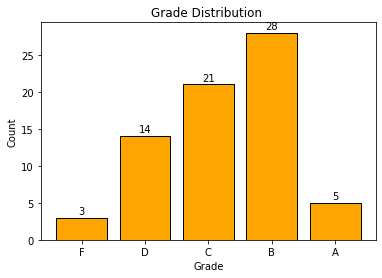

In [6]:
# Rearrange the grade_counts seires by grade
grade_counts = grade_counts.reindex(['F', 'D', 'C', 'B', 'A'])

#plots a histogram of the grade distribution
fig, ax = plt.subplots()
ax.bar(grade_counts.index, grade_counts, color='orange', edgecolor='black')
ax.set_xlabel('Grade')
ax.set_ylabel('Count') 
ax.set_title('Grade Distribution ')

for i, count in enumerate(grade_counts):
    ax.text(i, count + 0.5, str(count), ha='center') 



### Problem 3 - Barplot and Boxplot in the Same Figure

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
# Read the data from the CSV file and ignore comments
data = pd.read_csv('solution_data.csv', comment='%',names=['Problem','SolnMethod','Value'])

Labels=['genetic algorithm', 'simulated annealing', 'tabu search']

In [ ]:

# Filter to only rows with solution methods  
data = data[data['SolnMethod'].isin(['optimal', 'genetic algorithm', 'simulated annealing', 'tabu search'])]


optimal= data[data.iloc[:, 1]=='optimal']['Value'].reset_index(drop = True)
genetic_algorithm = data[data.iloc[:, 1]=='genetic algorithm']['Value'].reset_index(drop = True)
simulated_annealing = data[data.iloc[:, 1]=='simulated_annealing']['Value'].reset_index(drop = True)
tabu_search = data[data.iloc[:, 1]=='tabu search']['Value'].reset_index(drop = True)


gap_genetic_algorithm =(optimal -genetic_algorithm)/optimal*100
gap_simulated_annealing =(optimal -simulated_annealing)/optimal*100
gap_tabu_search =(optimal -tabu_search)/optimal*100 

bar_plt= pd.series([gap_genetic_algorithm.mean(), gap_simulated_annealing.mean(), gap_tabu_search.mean()])
box_plt=pd.concat([gap_genetic_algorithm, gap_simulated_annealing, gap_tabu_search], axis=1)


In [ ]:
box_plt.columns = ['Genetic Algorithm', 'Simulated Annealing', 'Tabu Search']
fig,(ax1, ax2) = plt.subplots(1,2,figsize=[15,5])
ax1.bar(box_plt.index, box_plt,color='orange',edgecolor='black')

In [ ]:
ax1.set_xlabel('Heuristic Method')
ax1.set_ylabel('optimality gap(%)')


In [ ]:
ax2.boxplot(box_plt,labels= Labels)
ax1.set_xlabel('Heuristic Method')
ax1.set_ylabel('Distribution of Gaps')

--- 
## Part 2 - Explore New Plot Types

This is multpile line plot that shows the trend of different crime categories over a period. The plot visually shows the increase in crime rate for a given crime using a color coded legend that assign a color to each category of  crime. 

- **URL of Example Code**: https://www.dataquest.io/blog/plot-dataframe-pandas/
- **URL of Sample Data**:  https://www.kaggle.com/datasets/mahmoudshogaa/us-crime-rates-1960-2014

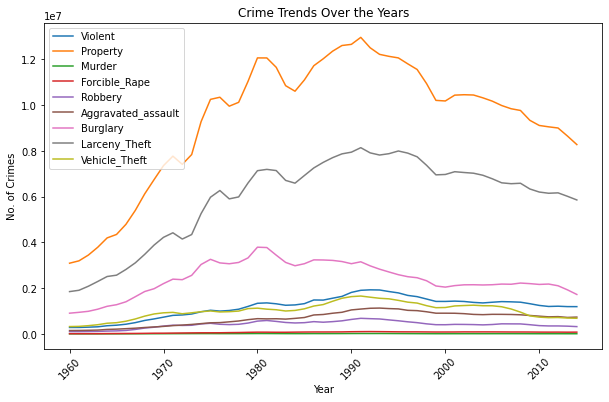

In [160]:
import pandas as pd
import matplotlib.pyplot as plt

data =pd.read_csv('US_Crime_Rates_1960_2014.csv')

# Sets the 'Year' column as the index
data.set_index('Year', inplace=True)

# Creates a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Selects the columns for crime categories
crime_categories = [ 'Violent', 'Property', 'Murder', 'Forcible_Rape', 'Robbery', 'Aggravated_assault', 'Burglary', 'Larceny_Theft', 'Vehicle_Theft']

# Plots each crime category as a separate line
for category in crime_categories:
    ax.plot(data.index, data[category], label=category)

# Sets the labels and title
ax.set_xlabel('Year')
ax.set_ylabel('No. of Crimes')
ax.set_title('Crime Trends Over the Years')

# Displays the legend
ax.legend()

# Rotates the x-axis label
plt.xticks(rotation=45)

# Shows the plot
plt.show()


[Now, finish up your plot with a Markdown explanation of the key elements of the above code.  It is particularly useful to provide examples of how someone else might want to customize your plot.  For example, perhaps they might want to change colors, font sizes, scales, etc.] 